# Analisando dados com Pandas - Gráficos

Nas últimas postagens falei de como tratar nossos dados, como agrupa-los, agora chegou o momento de trabalharmos com outro tipo de apresentação dos dados, neste caso vamos trabalhar com gráficos. Vamos importar os dados exatamente da mesma maneira que fizemos nas postagens anteriores, caso você ainda não tenha os visto eles estão [aqui](https://medium.com/@helberfernandes2000/analisando-dados-com-pandas-497faf234878) e [aqui](https://medium.com/@helberfernandes2000/analisando-dados-com-pandas-as-duas-torres-918a5fafaab8).

## Importando os dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv', delimiter=';', encoding='iso-8859-1', parse_dates=['data'], dayfirst=True)

In [3]:
data.head()

,id,data,horario,especialidade
0,24554,2018-06-11,11:33:51,Clínica Médica
1,24553,2018-06-11,11:33:27,Neurologia
2,24552,2018-06-11,11:33:22,Clínica Médica
3,24551,2018-06-11,11:17:35,Neurologia
4,24550,2018-06-11,11:16:47,Pediatria


## Preparando os dados

Antes de iniciarmos com os gráficos, vamos antes ver uma funcionalidade bastante útil para nosso dia a dia. Muitas vezes nós desejamos substituir algo em nossos dados como, por exemplo, neste caso vamos substituir os caracteres são `é` e `í` da palavra `Clínica Médica`, este é um exemplo simples mais server para ilustrar a necessidade, no dia a dia podemos ter necessidades mais importantes e complexas para isso podemos utilizar regex, então vamos ver como realizar este procedimento.

In [4]:
data=data.replace({'especialidade': {u'é':'e', u'í':'i'}}, regex=True)
data.head()

,id,data,horario,especialidade
0,24554,2018-06-11,11:33:51,Clinica Medica
1,24553,2018-06-11,11:33:27,Neurologia
2,24552,2018-06-11,11:33:22,Clinica Medica
3,24551,2018-06-11,11:17:35,Neurologia
4,24550,2018-06-11,11:16:47,Pediatria


## Gráficos

Inicialmente queremos saber a quantidade de atendimentos por especialidades, para isso vamos agrupar os dados e em seguida criar nosso gráfico. O Pandas facilita o trabalho de criar os gráficos encapsulando a biblioteca Matplotlib. Para criar os gráficos precisamos apenas chamar a função `plot()`, por padrão o Pandas irá exibir os dados como um gráfico de linha.

In [5]:
data.groupby(['especialidade']).especialidade.count().plot()

Como podemos ver na [documentação](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) ele possue os seguintes tipos de gráficos:
* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot

Então se desejamos ver nosso resultado anterior como um gráfico de barras, por exemplo, só precisamos informar o tipo, como o comando a seguir:

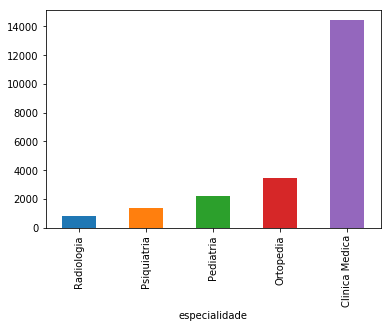

In [6]:
data.groupby(['especialidade']).especialidade.count().sort_values()[-5:].plot(kind='bar')

Exibi os últimos 5 resultados depois de ordenar e podemos perceber que o maior tipo de atendimento de nosso hospital seria o de clínica médica, agora em termos percentuais qual é o percentual dos outros tipos de atendimentos, eles correspondem juntos a quantos porcento do atendimento do hospital? Para descobrir podemos fazer o seguinte.

In [7]:
import numpy as np
especialidades = np.where(data['especialidade'].str.contains('Clinica Medica'), 
                          'Clinica Medica', 'Outras Especialidades')
especialidades_group = data.groupby(['especialidade', especialidades]).size().unstack().fillna(0)
especialidades_group

,Clinica Medica,Outras Especialidades
especialidade,,
Cardiologista,0.0,2.0
Clinica Medica,14416.0,0.0
Dermatologista,0.0,6.0
Ecocardiografia,0.0,2.0
Ecografia,0.0,1.0
Ginecologista,0.0,2.0
Mamografia,0.0,1.0
Neurologia,0.0,575.0
Oftalmologista,0.0,1.0


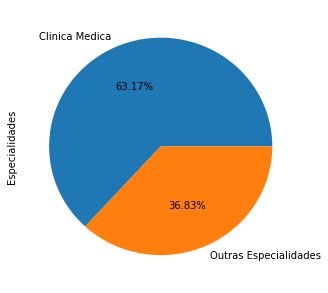

In [8]:
especialidades_group.sum().plot(kind='pie', autopct='%0.2f%%',  figsize=(5, 5), label='Especialidades')

Com o auxílio de outra biblioteca fantástica do Python o `numpy` utilizamos a função `where` para ajudar no agrupamento dos dados entre clinica média e outras especialidades, ou seja, criamos um `numpy.ndarray` com o nome de `especialidades`, onde no nosso conjunto de dados continha os nomes de outras especialidades substituirmos por `Outras Especialidades` e em seguida enviamos para o agrupamento do pandas para filtrar os dados e obtivemos o resultado mostrado quando imprimimos o `especialidades_group`.

Com tudo isso feito tudo estava pronto para criamos o gráfico assim apenas foi nescessário somar o resultado das colunas: `Clinica Médica` e `outras especialidades`, por fim invocamos a função plot com os seguintes parâmetros: `kind='pie'`, para exibir os dados como um gráfico de pizza, `autopct='%0.2f%%'`, para habilitar a função de percentual e neste caso queremos o percentual com duas casas decimais, o `figsize=(5, 5)` onde definimos o tamanho da nossa imagem e por fim, `label='Especialidades'` para especificar a label do gráfico. Adicionalmente poderíamos especificar o parâmetro `title` para definir um título para nosso gráfico.

Muito bem! Descobrimos então que as outras especialidades correspondem apenas a 36,83% enquanto a Clínica Médica corresponde ao maior percentual de nossos atendimentos, extraímos esta informação de forma rápida e não tão complexa além de podermos tratar nossos dados para outras necessidades. O panda facilita e muito este trabalho de análise e talvez para uma tomada de decisão.

## Atendimentos por ano

Agora vamos verificar em termos percentuais os atendimentos por ano, a fim de obtermos informações do quanto estamos crescendo no ano corrente em relação ao ano anterior. Para isso vamos agruparmos os dados por ano e em seguida vamos calcular a quantidade, por fim vamos exibir o gráfico, já explicamos os parâmetros deste gráfico anteriormente.

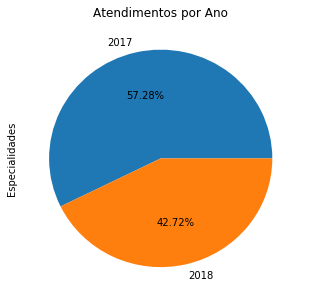

In [9]:
total_atendimento_ano=data.groupby([data['data'].dt.year]).size()
total_atendimento_ano.plot(kind='pie', autopct='%0.2f%%',  figsize=(5, 5), label='Especialidades', 
                           title= 'Atendimentos por Ano')

Podemos perceber que o ano de `2017` corresponde a 57,28% de nossos atendimentos analisados, agora queremos saber quanto cada especialidade atendeu por ano.

Primeiramente vamos remover as colunas que não queremos trabalhar, depois vamos agrupar os dados por ano e especialidade e em seguida calcular os atendimentos. Vamos transformar nosso level na posição zero para coluna e finalizamos com um gráfico de barras, definimos o tamanho do gráfico de tamanho 20 por 5.

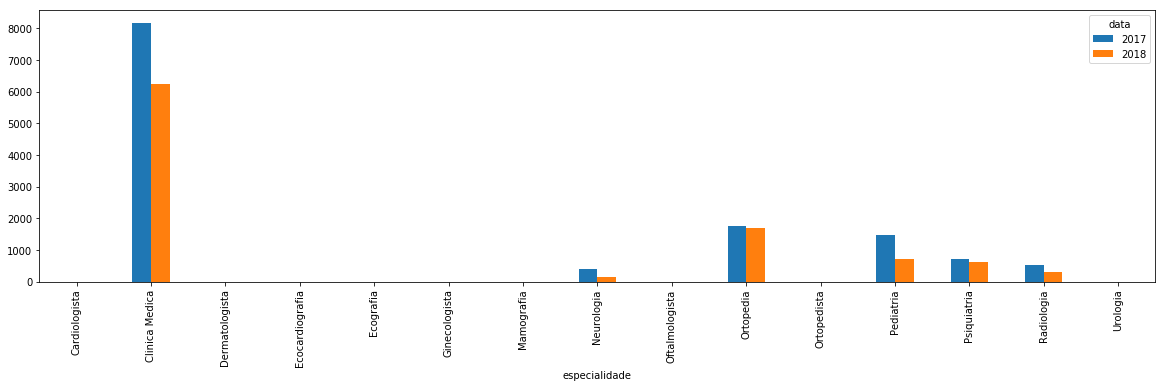

In [10]:
total_atendimento_ano=data.drop(['id', 'horario'], axis=1)
total_atendimento_ano=data.groupby([data['data'].dt.year, 'especialidade']).size()
total_atendimento_ano = total_atendimento_ano.unstack(level=0).fillna(0)
total_atendimento_ano.plot(kind='bar', figsize=(20, 5))

Agora vamos agrupar os atendimentos por ano.

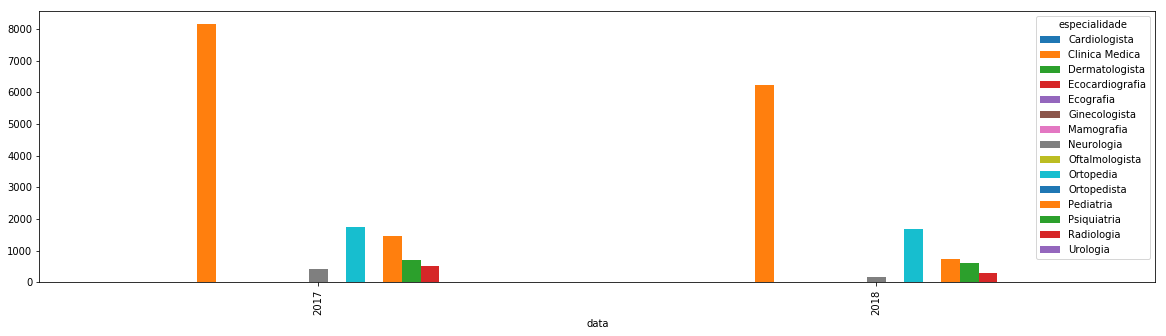

In [11]:
especialidades=data.drop(['id', 'horario'], axis=1)
especialidades.groupby([data['data'].dt.year, 'especialidade']).size().unstack(1).fillna(0).plot(kind='bar',
                                                                                                 figsize=(20,5))

Para finalizarmos vamos obter os dados mensais por ano.
O primeiro passo que vamos realizar é remover as colunas que não vamos utilizar, em seguida vamos agrupar os dados por ano e mês depois vamos calcular os atendimentos.
Depois vamos renomear os meses e seguida vamos transformar o level zero em colunas e para os valores faltantes vamos definir o valor zero.
Por fim vamos plotar os dados.

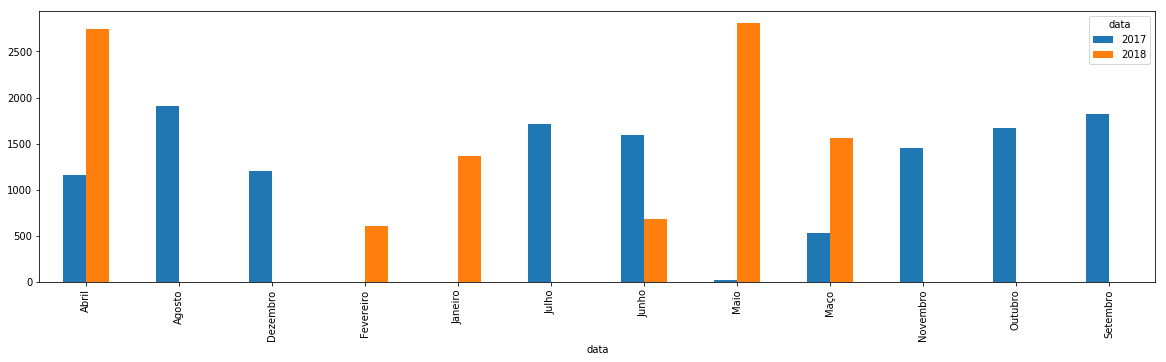

In [12]:
ano_mes=data.drop(['id', 'horario'], axis=1)
ano_mes=ano_mes.groupby([data['data'].dt.year, data['data'].dt.month]).size()
ano_mes=ano_mes.rename({1: 'Janeiro', 2: 'Fevereiro', 3: 'Maço', 4: 'Abril', 5: 'Maio', 6:'Junho', 7:'Julho', 
                        8:'Agosto', 9:'Setembro', 10:'Outubro', 11: 'Novembro', 12:'Dezembro'})
ano_mes= ano_mes.unstack(level=0).fillna(0)
ano_mes.plot(kind='bar', figsize=(20,5))

Podemos perceber que no mês de abril tivemos mais atendimentos para o ano de 2018 assim como no mês de maio, porém, os meses de novembro, outubro e setembro tivemos atendimento somente no ano de 2017.

## Conclusão

Durante estes três artigos tentei mostrar um pouco da grande capacidade do pandas para nos auxiliar na análise dos dados. Partimos de uma simples leitura dos dados até a exibição de gráficos. Espero ter ajudado a entender esta magnifica ferramenta além de ajudar no nosso dia a dia.